Importing Required Libraries

In [1]:
import pandas as pd #for dataframes
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt #for plotting graphs
import seaborn as sns  #for plotting graphs

Extracting data set using pandas

In [5]:
# Reading the Data set
df_report_2017 = pd.read_csv("earnings2017.csv")
df_report_2017.head()

,NAME,DEPARTMENT NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN/EDUCATION INCENTIVE,TOTAL EARNINGS,POSTAL
0,"Miller,Francis T",Boston Police Department,Police Lieutenant (Det),"$129,530.83",NaN,"$13,694.50","$8,150.41",NaN,NaN,"$24,286.86","$175,662.60",2043
1,"Sullivan,Patrice Murphy",Boston Police Department,Office Manager,"$56,921.80",NaN,"$3,594.65","$1,548.16",NaN,NaN,NaN,"$62,064.61",2132
2,"O'Hara,Michael C",Boston Police Department,Police Lieutenant,"$124,056.64",NaN,"$6,432.23","$29,043.67",NaN,"$22,385.00","$23,260.69","$205,178.23",2021
3,"Whalen,Richard L",Boston Police Department,Police Detective,"$94,956.25","$4,985.32","$13,591.93","$85,419.22",$58.03,"$16,330.00","$19,971.01","$235,311.76",2062
4,"Kelly,Ann Marie",Boston Police Department,Tape Librarian I (BPD),"$69,995.34",NaN,$300.00,"$7,961.08",NaN,NaN,NaN,"$78,256.42",2190


Cleaning the data set

In [7]:
# It gives total count of values present but not null counts
print(df_report_2017.info())

# Describing the data set
print(df_report_2017.describe())

# Describing the dataset columns
print(df_report_2017.columns.tolist())

# The shape of the dataset-rows*columns
print(df_report_2017.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22245 entries, 0 to 22244
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   NAME                       22245 non-null  object
 1   DEPARTMENT NAME            22245 non-null  object
 2   TITLE                      22245 non-null  object
 3   REGULAR                    21640 non-null  object
 4   RETRO                      3258 non-null   object
 5   OTHER                      13083 non-null  object
 6   OVERTIME                   6783 non-null   object
 7   INJURED                    1283 non-null   object
 8   DETAIL                     2423 non-null   object
 9   QUINN/EDUCATION INCENTIVE  1259 non-null   object
 10  TOTAL EARNINGS             22245 non-null  object
 11  POSTAL                     22242 non-null  object
dtypes: object(12)
memory usage: 2.0+ MB
None
                    NAME           DEPARTMENT NAME    TITLE     REGULAR  \


Renaming Inconsistent Column names for better understanding

In [8]:
# Renaming the columns which makes easy to identify
df_report_2017 = df_report_2017.rename(columns = {'NAME':'FULL NAME', 'TITLE':'EMPLOYEE POSITION TITLE', 'REGULAR':'BASE PAY ($)', 'RETRO':'RETRO PAY ($)', 'OTHER':'OTHER PAY ($)', 'OVERTIME':'OVERTIME PAY ($)', 'INJURED':'INJURED PAY ($)', 'DETAIL':'DETAIL PAY ($)', 'QUINN/EDUCATION INCENTIVE':'QUINN/EDUCATION INCENTIVE ($)', 'TOTAL EARNINGS':'TOTAL EARNINGS ($)', 'POSTAL':'POSTAL CODE'})
df_report_2017.head()

,FULL NAME,DEPARTMENT NAME,EMPLOYEE POSITION TITLE,BASE PAY ($),RETRO PAY ($),OTHER PAY ($),OVERTIME PAY ($),INJURED PAY ($),DETAIL PAY ($),QUINN/EDUCATION INCENTIVE ($),TOTAL EARNINGS ($),POSTAL CODE
0,"Miller,Francis T",Boston Police Department,Police Lieutenant (Det),"$129,530.83",NaN,"$13,694.50","$8,150.41",NaN,NaN,"$24,286.86","$175,662.60",2043
1,"Sullivan,Patrice Murphy",Boston Police Department,Office Manager,"$56,921.80",NaN,"$3,594.65","$1,548.16",NaN,NaN,NaN,"$62,064.61",2132
2,"O'Hara,Michael C",Boston Police Department,Police Lieutenant,"$124,056.64",NaN,"$6,432.23","$29,043.67",NaN,"$22,385.00","$23,260.69","$205,178.23",2021
3,"Whalen,Richard L",Boston Police Department,Police Detective,"$94,956.25","$4,985.32","$13,591.93","$85,419.22",$58.03,"$16,330.00","$19,971.01","$235,311.76",2062
4,"Kelly,Ann Marie",Boston Police Department,Tape Librarian I (BPD),"$69,995.34",NaN,$300.00,"$7,961.08",NaN,NaN,NaN,"$78,256.42",2190


Checking the duplicates

In [25]:
# checking whether the columns are unique or not
df_report_2017['FULL NAME'].is_unique
df_report_2017['DEPARTMENT NAME'].is_unique
df_report_2017['POSTAL CODE'].is_unique

# duplicates in 'NAME' column with different postal codes
names = df_report_2017['FULL NAME'].value_counts()
display(names[names>1])

# This tells there are no duplicate rows because it takes the entire row. We used 'apply' fuunction to use shape module
df_report_2017.groupby(df_report_2017['FULL NAME']).apply(np.shape)
print(df_report_2017.duplicated('FULL NAME'))

# checking the duplicates by droping the duplicates and finding the shape of the data set after dropping duplicates
display(df_report_2017.shape)  #before dropping duplicates
df_report_2017 = df_report_2017.drop_duplicates()
df_report_2017.reset_index(drop=True, inplace=True)
display(df_report_2017.shape)


Sullivan,Michael      4
Kelly,Michael         3
Kelly,John F          2
Torres,Elizabeth      2
Foley,William P       2
                     ..
Curtis,Christopher    2
Smith,Robert          2
Kelley,Susan          2
Colon,Francisco       2
Finnigan,Patricia     2
Name: FULL NAME, Length: 76, dtype: int64

0        False
1        False
2        False
3        False
4        False
         ...  
22240    False
22241     True
22242    False
22243    False
22244    False
Length: 22245, dtype: bool


(22245, 12)

(22245, 12)

Cleaning unwanted Data in First 3 columns

In [29]:
# Removing any special symbols present in first 3 columns of data set
df_report_2017['EMPLOYEE POSITION TITLE'] = df_report_2017['EMPLOYEE POSITION TITLE'].str.replace(r"\(.*\)", "")
df_report_2017['DEPARTMENT NAME'] = df_report_2017['DEPARTMENT NAME'].str.replace(r"\(.*\)", "")
df_report_2017['EMPLOYEE POSITION TITLE'] = df_report_2017['EMPLOYEE POSITION TITLE'].str.split('/').str[0]
df_report_2017['EMPLOYEE POSITION TITLE'] = df_report_2017['EMPLOYEE POSITION TITLE'].str.split('-').str[0]
df_report_2017['EMPLOYEE POSITION TITLE'] = df_report_2017['EMPLOYEE POSITION TITLE'].str.split(',').str[0]
df_report_2017['DEPARTMENT NAME'] = df_report_2017['DEPARTMENT NAME'].str.split('/').str[0]
df_report_2017['DEPARTMENT NAME'] = df_report_2017['DEPARTMENT NAME'].str.split('-').str[0]

# Removing any special characters present in Full name, department name and Employee position title
df_report_2017[['DEPARTMENT NAME', 'EMPLOYEE POSITION TITLE']] = df_report_2017[['DEPARTMENT NAME', 'EMPLOYEE POSITION TITLE']].replace({'\$': '', ',': '','\##':'','\###':'','""':'','#':''}, regex=True)

# Removing the ',.' present in the FULL NAME of a data set
df_report_2017['FULL NAME'] = df_report_2017['FULL NAME'].str.replace(",", " ")
df_report_2017['FULL NAME'] = df_report_2017['FULL NAME'].str.replace(".", " ")

#checking whether the symbols are removed or not
display(df_report_2017[df_report_2017['FULL NAME']=='Nicholson Anthony'])

,FULL NAME,DEPARTMENT NAME,EMPLOYEE POSITION TITLE,BASE PAY ($),RETRO PAY ($),OTHER PAY ($),OVERTIME PAY ($),INJURED PAY ($),DETAIL PAY ($),QUINN/EDUCATION INCENTIVE ($),TOTAL EARNINGS ($),POSTAL CODE
18371,Nicholson Anthony,BPS Cl10 Lee Academy,Surround Care Paraprofessional,"$42,189.22",NaN,"$2,200.00",NaN,NaN,NaN,NaN,"$44,389.22",2119


Cleaning unwanted data in Postal code column

In [34]:
# The postal value for a full name of employee 'Morrison,June', contains "BIS 3"
df = df_report_2017['FULL NAME'] == 'Morrison June'
display(df_report_2017.loc[df])

# Many values in Postal codes are unknown. we have to replace those with NAN.
df_report_2017['POSTAL CODE'].loc[22139:22182] # Before cleaning

# replacing' UNKNO' in "POSTAL CODE" with NaN
df_report_2017.replace(to_replace='UNKNO', value=np.nan, inplace=True)

#replacing "B1S 3" value in "POSTAL CODE" with NAN
df_report_2017['POSTAL CODE'].replace(to_replace="B1S 3", value=np.nan, inplace=True)
df=df_report_2017['FULL NAME']== 'Morrison June'
df_report_2017.loc[df]

,FULL NAME,DEPARTMENT NAME,EMPLOYEE POSITION TITLE,BASE PAY ($),RETRO PAY ($),OTHER PAY ($),OVERTIME PAY ($),INJURED PAY ($),DETAIL PAY ($),QUINN/EDUCATION INCENTIVE ($),TOTAL EARNINGS ($),POSTAL CODE
6818,Morrison June,BPS Business Service,BPS Worker's Comp Job Class,NaN,NaN,NaN,NaN,"$67,171.05",NaN,NaN,"$67,171.05",B1S 3


,FULL NAME,DEPARTMENT NAME,EMPLOYEE POSITION TITLE,BASE PAY ($),RETRO PAY ($),OTHER PAY ($),OVERTIME PAY ($),INJURED PAY ($),DETAIL PAY ($),QUINN/EDUCATION INCENTIVE ($),TOTAL EARNINGS ($),POSTAL CODE
6818,Morrison June,BPS Business Service,BPS Worker's Comp Job Class,NaN,NaN,NaN,NaN,"$67,171.05",NaN,NaN,"$67,171.05",NaN


Missing data

In [42]:
# Null values in all columns(False or True)
df_report_2017.isnull().any()
df_report_2017.info()

# to describe the rows and columns without null values
df_report_2017.dropna().describe()

# to describe the data set considering all values
df_report_2017.describe()

# Total NAN values in our data
df_report_2017.isnull()
df_report_2017.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22245 entries, 0 to 22244
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   FULL NAME                      22245 non-null  object
 1   DEPARTMENT NAME                22245 non-null  object
 2   EMPLOYEE POSITION TITLE        22245 non-null  object
 3   BASE PAY ($)                   21640 non-null  object
 4   RETRO PAY ($)                  3258 non-null   object
 5   OTHER PAY ($)                  13083 non-null  object
 6   OVERTIME PAY ($)               6783 non-null   object
 7   INJURED PAY ($)                1283 non-null   object
 8   DETAIL PAY ($)                 2423 non-null   object
 9   QUINN/EDUCATION INCENTIVE ($)  1259 non-null   object
 10  TOTAL EARNINGS ($)             22245 non-null  object
 11  POSTAL CODE                    22195 non-null  object
dtypes: object(12)
memory usage: 2.0+ MB


FULL NAME                            0
DEPARTMENT NAME                      0
EMPLOYEE POSITION TITLE              0
BASE PAY ($)                       605
RETRO PAY ($)                    18987
OTHER PAY ($)                     9162
OVERTIME PAY ($)                 15462
INJURED PAY ($)                  20962
DETAIL PAY ($)                   19822
QUINN/EDUCATION INCENTIVE ($)    20986
TOTAL EARNINGS ($)                   0
POSTAL CODE                         50
dtype: int64

checking the Data Types of the columns

In [45]:
# Data types of columns
df_report_2017.dtypes

# creating a list of required columns where we need to remove the $ symbol
cols=["BASE PAY ($)","RETRO PAY ($)","OTHER PAY ($)","OVERTIME PAY ($)","INJURED PAY ($)","DETAIL PAY ($)","QUINN/EDUCATION INCENTIVE ($)","TOTAL EARNINGS ($)"]

# Converting all object data type columns to String data type
df_report_2017['BASE PAY ($)'] = df_report_2017['BASE PAY ($)'].astype(str)
df_report_2017['RETRO PAY ($)'] = df_report_2017['RETRO PAY ($)'].astype(str)
df_report_2017['OTHER PAY ($)'] = df_report_2017['OTHER PAY ($)'].astype(str)
df_report_2017['OVERTIME PAY ($)'] = df_report_2017['OVERTIME PAY ($)'].astype(str)
df_report_2017['INJURED PAY ($)'] = df_report_2017['INJURED PAY ($)'].astype(str)
df_report_2017['DETAIL PAY ($)'] = df_report_2017['DETAIL PAY ($)'].astype(str)
df_report_2017['QUINN/EDUCATION INCENTIVE ($)'] = df_report_2017['QUINN/EDUCATION INCENTIVE ($)'].astype(str)

# Removing the DOLLAR SYMBOL '$' from the pay details columns
df_report_2017[cols] = df_report_2017[cols].replace({'\$': '','\(': '', '\)':'', ',': ''}, regex=True)

# converting the data type of pay details of employee columns to float Data type
df_report_2017[cols] = df_report_2017[cols].astype('float')

# Data type of all columns of data set
df_report_2017.dtypes

# checking whether we can perform any operations or not
df_report_2017['BASE PAY ($)'] *2
    

0        259061.66
1        113843.60
2        248113.28
3        189912.50
4        139990.68
           ...    
22240      3408.02
22241      5554.88
22242     13220.00
22243      2341.00
22244     12425.26
Name: BASE PAY ($), Length: 22245, dtype: float64

Dropping few rows with NaN values for better analysis

In [46]:
# dropping NaN values in BASE PAY , TOTAL EARNINGS and POSTAL CODE columns
df_report_2017 = df_report_2017.dropna(subset=['BASE PAY ($)', 'TOTAL EARNINGS ($)','POSTAL CODE'])

# I removed all the NAN values in all columns to see who receive all payment options
df_report_2017_list = df_report_2017.dropna(subset=['BASE PAY ($)', 'TOTAL EARNINGS ($)','RETRO PAY ($)','OTHER PAY ($)','OVERTIME PAY ($)','INJURED PAY ($)','DETAIL PAY ($)','QUINN/EDUCATION INCENTIVE ($)','POSTAL CODE'])
df_report_2017_list

,FULL NAME,DEPARTMENT NAME,EMPLOYEE POSITION TITLE,BASE PAY ($),RETRO PAY ($),OTHER PAY ($),OVERTIME PAY ($),INJURED PAY ($),DETAIL PAY ($),QUINN/EDUCATION INCENTIVE ($),TOTAL EARNINGS ($),POSTAL CODE
3,Whalen Richard L,Boston Police Department,Police Detective,94956.25,4985.32,13591.93,85419.22,58.03,16330.0,19971.01,235311.76,2062
159,Shoulla Christopher K,Boston Police Department,Police Offc Comm Serv Offc 38,72854.70,2410.37,8364.66,62211.53,21193.90,30406.0,18490.71,215931.87,2339
178,Colburn Robert P,Boston Police Department,Police Offc Canine 26,14733.76,2170.50,14232.27,2842.65,78984.76,7176.0,18470.46,138610.40,2081
207,Manning John J,Boston Police Department,Police Officer,29847.00,2457.15,800.00,9265.20,63339.98,11914.0,14733.53,132356.86,2370
260,Worthy Jeffrey Maurice,Boston Police Department,Police Officer,44597.40,1888.97,5982.59,5838.17,48467.81,10580.0,18318.81,135673.75,2119
...,...,...,...,...,...,...,...,...,...,...,...,...
17624,Lizardo Steven,Boston Police Department,Police Officer,82472.43,1443.11,800.00,29693.28,1901.17,7728.0,13457.25,137495.24,2136
17645,O'Brien Jonathan,Boston Police Department,Police Officer,84709.10,1571.50,800.00,36617.40,33.78,15594.0,6760.63,146086.41,2127
17649,Gigliello James M,Boston Police Department,Police Officer,53110.39,1253.05,1800.00,16265.53,29909.18,19274.0,13229.06,134841.21,2132
17664,Leo Rebecca J,Boston Police Department,Police Officer,52761.33,1384.55,800.00,8721.06,31947.77,2668.0,6979.79,105262.50,2131


Data Exploration

Employee with highest base pay

In [49]:
#To identify which employee in the all departments gets highest base salary and from which area(postal code).
high_sal_index = df_report_2017_list['BASE PAY ($)'].idxmax()

print("Name of the employee who gets highest base pay of all departments : ",df_report_2017_list.loc[high_sal_index]['FULL NAME'])

# To know the highest paid (base pay) department 
print("highest base salary department is :",df_report_2017_list.loc[high_sal_index]['DEPARTMENT NAME'])

# To know the entire details of employee with highest base pay
df_report_2017_list.loc[high_sal_index]


Name of the employee who gets highest base pay of all departments :  Brown Michael A
highest base salary department is : Boston Police Department


FULL NAME                                 Brown Michael A
DEPARTMENT NAME                  Boston Police Department
EMPLOYEE POSITION TITLE                   Police Sergeant
BASE PAY ($)                                       102163
RETRO PAY ($)                                     2477.61
OTHER PAY ($)                                     8737.68
OVERTIME PAY ($)                                  29762.4
INJURED PAY ($)                                    2988.3
DETAIL PAY ($)                                      61904
QUINN/EDUCATION INCENTIVE ($)                       19348
TOTAL EARNINGS ($)                                 227381
POSTAL CODE                                          2050
Name: 9964, dtype: object

Highly educated employee

In [50]:
#To identify which employee is highly educated based on the QUINN/EDUCATION INCENTIVE
 
high_pay_quinn_index = df_report_2017_list['QUINN/EDUCATION INCENTIVE ($)'].idxmax()
print(" The employee who is highly educated and gets high QUINN incentive is :",df_report_2017_list.loc[high_pay_quinn_index]['FULL NAME'])

# The details of the employee with highest education qualification and gets high quinn incentive
df_report_2017_list.loc[high_pay_quinn_index]


 The employee who is highly educated and gets high QUINN incentive is : Difazio Vincent J


FULL NAME                               Difazio Vincent J
DEPARTMENT NAME                  Boston Police Department
EMPLOYEE POSITION TITLE                  Police Detective
BASE PAY ($)                                      37969.1
RETRO PAY ($)                                      1977.4
OTHER PAY ($)                                     9548.65
OVERTIME PAY ($)                                  31197.2
INJURED PAY ($)                                   60872.1
DETAIL PAY ($)                                       8740
QUINN/EDUCATION INCENTIVE ($)                     20670.5
TOTAL EARNINGS ($)                                 170975
POSTAL CODE                                          2351
Name: 363, dtype: object

Employee who works for long hours

In [51]:
#To identify the employee who is working for long hours based on highest OVERTIME payment
high_pay_overtime_index = df_report_2017_list['OVERTIME PAY ($)'].idxmax()
print(" The employee who get high overtime pay is :",df_report_2017_list.loc[high_pay_overtime_index]['FULL NAME'])

# Details of the employee
df_report_2017_list.loc[high_pay_overtime_index]


 The employee who get high overtime pay is : Whalen Richard L


FULL NAME                                Whalen Richard L
DEPARTMENT NAME                  Boston Police Department
EMPLOYEE POSITION TITLE                  Police Detective
BASE PAY ($)                                      94956.2
RETRO PAY ($)                                     4985.32
OTHER PAY ($)                                     13591.9
OVERTIME PAY ($)                                  85419.2
INJURED PAY ($)                                     58.03
DETAIL PAY ($)                                      16330
QUINN/EDUCATION INCENTIVE ($)                       19971
TOTAL EARNINGS ($)                                 235312
POSTAL CODE                                          2062
Name: 3, dtype: object

Employee with highest earnings

In [52]:
# Overall which employee has highest total earnings( adding all payment details)

high_earnings_index = df_report_2017_list['TOTAL EARNINGS ($)'].idxmax()
print(" The employee who earns more :",df_report_2017_list.loc[high_earnings_index]['FULL NAME'])

# Details of the employee
df_report_2017_list.loc[high_earnings_index]

 The employee who earns more : Almeida Ismael Lopes


FULL NAME                            Almeida Ismael Lopes
DEPARTMENT NAME                  Boston Police Department
EMPLOYEE POSITION TITLE                    Police Officer
BASE PAY ($)                                      86918.1
RETRO PAY ($)                                     5650.64
OTHER PAY ($)                                         800
OVERTIME PAY ($)                                  24288.6
INJURED PAY ($)                                    654.55
DETAIL PAY ($)                                     126822
QUINN/EDUCATION INCENTIVE ($)                     13961.8
TOTAL EARNINGS ($)                                 259096
POSTAL CODE                                          2124
Name: 10929, dtype: object

Employee with least earnings

In [53]:
# Overall which employee has highest total earnings( adding all payment details)
least_earnings_index = df_report_2017_list['TOTAL EARNINGS ($)'].idxmin()
print(" The employee who earns very less :",df_report_2017_list.loc[least_earnings_index]['FULL NAME'])

# Details of the employee
df_report_2017_list.loc[least_earnings_index]


 The employee who earns very less : Leo Rebecca J


FULL NAME                                   Leo Rebecca J
DEPARTMENT NAME                  Boston Police Department
EMPLOYEE POSITION TITLE                    Police Officer
BASE PAY ($)                                      52761.3
RETRO PAY ($)                                     1384.55
OTHER PAY ($)                                         800
OVERTIME PAY ($)                                  8721.06
INJURED PAY ($)                                   31947.8
DETAIL PAY ($)                                       2668
QUINN/EDUCATION INCENTIVE ($)                     6979.79
TOTAL EARNINGS ($)                                 105262
POSTAL CODE                                          2131
Name: 17664, dtype: object

Data Visualization

Identifying Top 10 Employees with high earnings who receive all payments

In [54]:
# sorting the data set based on the TOTAL EARNINGS
df_report_2017_list.sort_values('TOTAL EARNINGS ($)', ascending=False, inplace=True)
top_earning_employees = df_report_2017_list.head(10)
top_earning_employees

e:\softwares\anacondafolder\envs\automatestuff\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,FULL NAME,DEPARTMENT NAME,EMPLOYEE POSITION TITLE,BASE PAY ($),RETRO PAY ($),OTHER PAY ($),OVERTIME PAY ($),INJURED PAY ($),DETAIL PAY ($),QUINN/EDUCATION INCENTIVE ($),TOTAL EARNINGS ($),POSTAL CODE
10929,Almeida Ismael Lopes,Boston Police Department,Police Officer,86918.09,5650.64,800.00,24288.60,654.55,126822.0,13961.83,259095.71,2124
3,Whalen Richard L,Boston Police Department,Police Detective,94956.25,4985.32,13591.93,85419.22,58.03,16330.0,19971.01,235311.76,2062
5580,Gero Jarrod A,Boston Police Department,Police Detective,84757.51,14709.90,3979.71,84081.42,3422.78,22080.0,15216.29,228247.61,2132
9964,Brown Michael A,Boston Police Department,Police Sergeant,102162.90,2477.61,8737.68,29762.42,2988.30,61904.0,19348.03,227380.94,2050
1093,Maloney Thomas F,Boston Police Department,Police Officer,90200.16,3557.76,4213.04,7882.04,1432.50,102350.0,14318.16,223953.66,2127
676,Fleming Edward J,Boston Police Department,Police Officer,90498.50,6744.43,9572.86,34129.15,683.45,66424.0,14504.06,222556.45,2360
1009,James Alfred A,Boston Police Department,Police Officer,67578.97,2796.07,8442.90,47050.73,26751.21,48806.0,14525.53,215951.41,2301
159,Shoulla Christopher K,Boston Police Department,Police Offc Comm Serv Offc 38,72854.70,2410.37,8364.66,62211.53,21193.90,30406.0,18490.71,215931.87,2339
518,Aviles Elvin,Boston Police Department,Police Officer,93180.42,2305.80,4091.29,37800.10,47.57,61456.0,14733.53,213614.71,2131
1304,Hill Dudley N,Boston Police Department,Police Officer,90908.77,6696.18,4123.00,56186.33,664.60,37858.0,14543.20,210980.08,2136


Total Earnings of employees in different areas (postal codes)

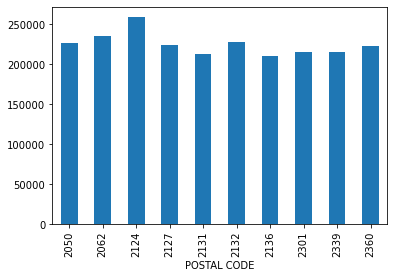

In [56]:
# TOTAL EARNINGS of employees in different postal code areas
top_earning_employees.groupby("POSTAL CODE")["TOTAL EARNINGS ($)"].mean().plot(kind="bar")

position of Employee with higher base pay

[None, None, None, None, None, None, None, None]

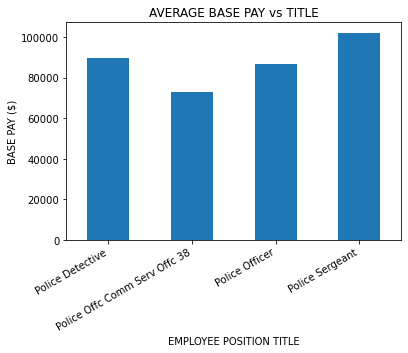

In [61]:
# Position of the employee who receives high BASE PAY 
ax=top_earning_employees.groupby('EMPLOYEE POSITION TITLE')['BASE PAY ($)'].mean().plot(kind='bar')
plt.ylabel('BASE PAY ($)')
plt.title("AVERAGE BASE PAY vs TITLE")
plt.setp(ax.get_xticklabels(),rotation=30, horizontalalignment='right')

Box plot for Total earnings based on department

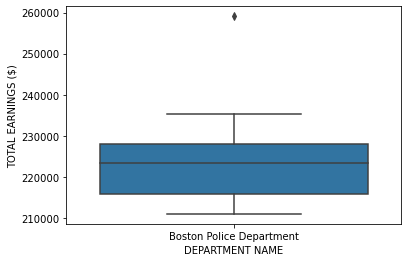

In [63]:
sns.boxplot(x="DEPARTMENT NAME", y="TOTAL EARNINGS ($)", data=top_earning_employees)

Identifying which type of pay contributed more to total earnings in different postal areas

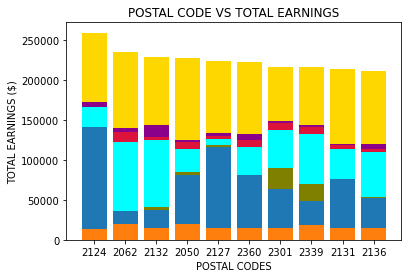

In [64]:
a=top_earning_employees['BASE PAY ($)']
b=top_earning_employees['DETAIL PAY ($)']
c=top_earning_employees['OTHER PAY ($)']
i=top_earning_employees['OVERTIME PAY ($)']
d=top_earning_employees['RETRO PAY ($)']
f=top_earning_employees['INJURED PAY ($)']
g=top_earning_employees['QUINN/EDUCATION INCENTIVE ($)']
h=top_earning_employees['POSTAL CODE']
plt.bar(h,a, bottom=b+c+d+f+g+i, color='gold') #BASE PAY
plt.bar(h,d, bottom=b+c+f+g+i, color='darkmagenta') #RETRO PAY
plt.bar(h,c,bottom=b+f+g+i,color='crimson')  # OTHER PAY
plt.bar(h,i,bottom=b+f+g,color='aqua')     # OVERTIME PAY
plt.bar(h,f,bottom=b+g,color='olive') # INJURED PAY 
plt.bar(h,b,bottom=g)   #DETAIL PAY
plt.bar(h,g)   #QUINN/EDUCATION INCENTIVE
plt.title('POSTAL CODE VS TOTAL EARNINGS')
plt.xlabel("POSTAL CODES")
plt.ylabel("TOTAL EARNINGS ($)")
plt.show()

Histograms for all pay columns

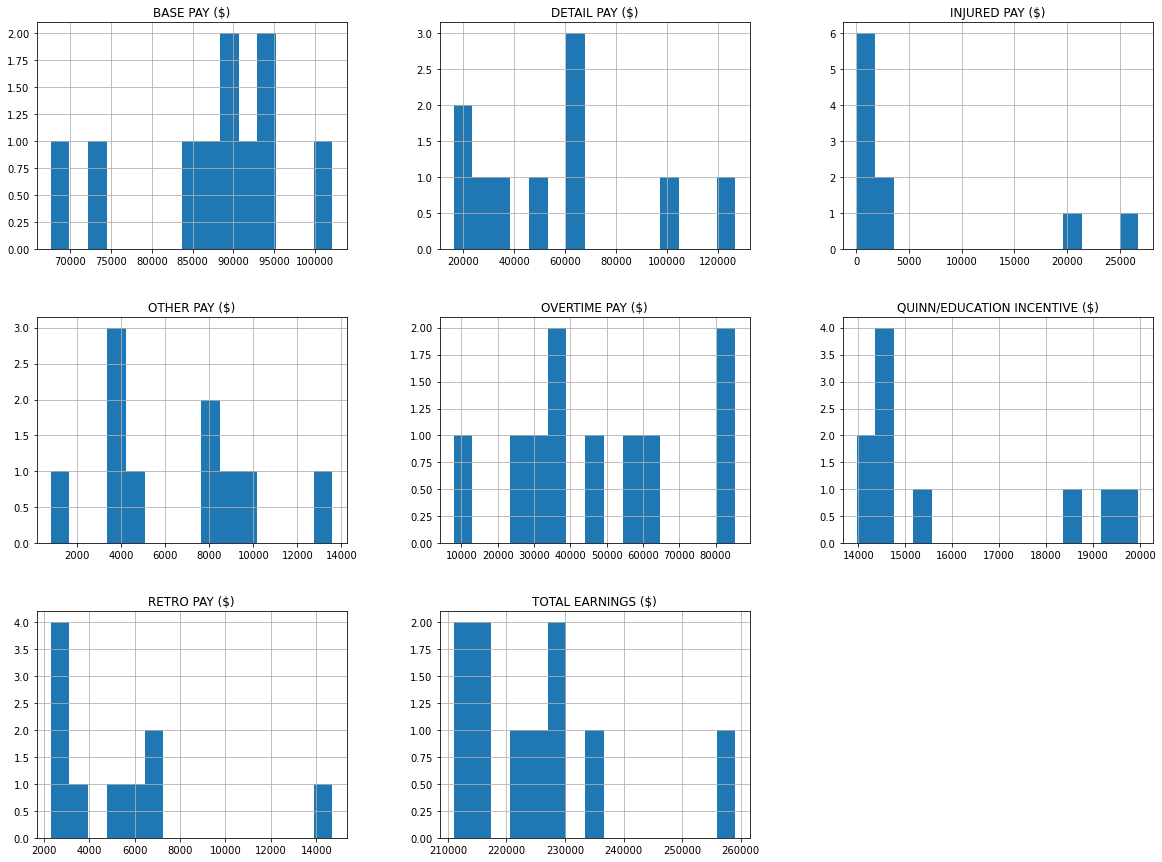

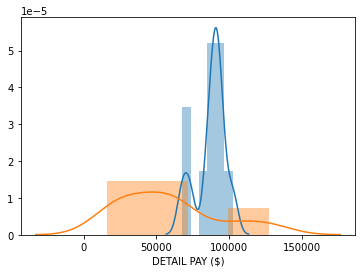

In [66]:
# Histograms for all pay columns
top_earning_employees.hist(bins=15, figsize=(20,15))
plt.ylabel('Frequency')
plt.show()
# distribution plot
sns.distplot(top_earning_employees['BASE PAY ($)'])
sns.distplot(top_earning_employees['DETAIL PAY ($)'])

lmplot for Quinn pay and base pay

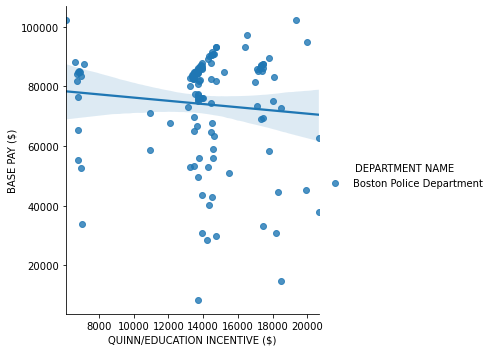

In [72]:
import seaborn as sns
sns.lmplot(x='QUINN/EDUCATION INCENTIVE ($)', y='BASE PAY ($)',hue='DEPARTMENT NAME', data=df_report_2017_list)